# Importing libraries

In [130]:
import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import re
import isodate
import seaborn as sns
from pymystem3 import Mystem
from wordcloud import *
from nltk.probability import FreqDist
import re
from nltk.corpus import stopwords

# Reading generated datasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_ukr = pd.read_csv('/content/drive/MyDrive/data_ukraine.csv')
df_usa = pd.read_csv('/content/drive/MyDrive/data_usa.csv')
df_blr = pd.read_csv('/content/drive/MyDrive/data_belarus.csv')
df_rus = pd.read_csv('/content/drive/MyDrive/data_russia.csv')

In [ ]:
del df_ukr['Unnamed: 0']
del df_usa['Unnamed: 0']
del df_blr['Unnamed: 0']
del df_rus['Unnamed: 0']
del df_rus['video_id']

In [ ]:
df_list = [df_rus, df_ukr, df_blr, df_usa]
df_list_rus = [df_rus, df_ukr, df_blr]

# Data Cleaning

Some of videos don't contain description or tags, so we have to fill it by empty string

In [ ]:
def fill_empty_decription_and_tags(df):
    df["video_description"] = df["video_description"].fillna(value="")
    df["video_tags"] = df["video_tags"].fillna(value="")

In [ ]:
for df in df_list:
    fill_empty_decription_and_tags(df = df)

The type of duration isn't suitable to make analyses, so we'll transform it into float

In [ ]:
def transform_duration(df):
  df['duration'] = list(map(isodate.parse_duration, df['duration']))
  df['duration'] = df['duration'] / np.timedelta64(1, 'm')

In [ ]:
for df in df_list:
  transform_duration(df)

To analyze how views and titles are connected, we'll create a feature title length

In [ ]:
def add_title_length_column(df):
  df['TL'] = df["video_title"].apply(lambda x: len(x))

In [ ]:
for df in df_list:
  add_title_length_column(df)

In df_blr there're 3 records with NaN values, so we'll drop 'em

In [ ]:
df_blr.dropna(inplace = True)

In [ ]:
for df in df_list:
  print(25 * '-')
  print(df.isnull().sum())

-------------------------
channel_title          0
video_title            0
video_description      0
video_category         0
video_view_count       0
video_comment_count    0
video_like_count       0
video_dislike_count    0
video_tags             0
region                 0
subscriptions          0
publish_date           0
weekday                0
LR                     0
DR                     0
VR                     0
duration               0
TL                     0
dtype: int64
-------------------------
channel_title          0
video_title            0
video_description      0
video_category         0
video_view_count       0
video_comment_count    0
video_like_count       0
video_dislike_count    0
video_tags             0
region                 0
subscriptions          0
publish_date           0
weekday                0
duration               0
LR                     0
DR                     0
VR                     0
TL                     0
dtype: int64
----------------------

## **Data Analyse**

In [ ]:
def get_heatmaps(df, country):
  fig, ax = plt.subplots(figsize = (11,10)) 
  _ = sns.heatmap(df.corr(),annot=True,cmap='coolwarm_r')
  _ = ax.set_title(country)
  fig.savefig(country + "heatmap.png")

In [ ]:
def get_popular_vidz_df(df):
  return df[df['video_view_count'] >= 1e6]

In [ ]:
def get_less_popular_vidz_df(df):
  return df[df['video_view_count'] < 1e6]

In [ ]:
df_rus_mln = get_popular_vidz_df(df_rus)
df_ukr_mln = get_popular_vidz_df(df_ukr)
df_blr_mln = get_popular_vidz_df(df_blr)
df_usa_mln = get_popular_vidz_df(df_usa)
df_popular_list = [df_rus_mln, df_ukr_mln, df_blr_mln, df_usa_mln]

In [ ]:
df_rus_less = get_less_popular_vidz_df(df_rus)
df_ukr_less = get_less_popular_vidz_df(df_ukr)
df_blr_less = get_less_popular_vidz_df(df_blr)
df_usa_less = get_less_popular_vidz_df(df_usa)
df_less_list = [df_rus_less, df_ukr_less, df_blr_less, df_usa_less]

In [ ]:
for df in df_popular_list:
  print(df.shape, len(df['channel_title'].unique()))

(706, 18) 32
(245, 18) 22
(176, 18) 19
(531, 18) 24


In [ ]:
for df in df_less_list:
  print(df.shape, len(df['channel_title'].unique()))

(1658, 18) 26
(2525, 18) 31
(1567, 18) 40
(1692, 18) 14


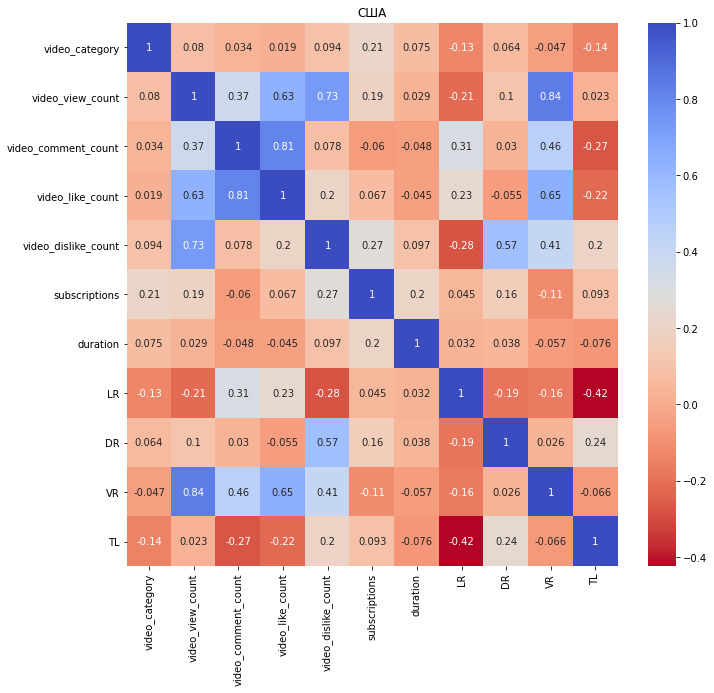

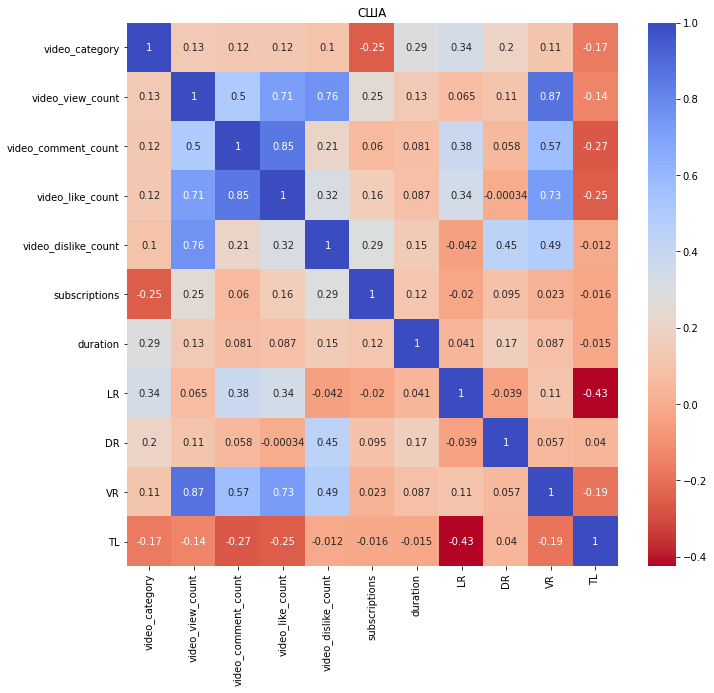

In [ ]:
get_heatmaps(df_usa_mln, 'США')
get_heatmaps(df_usa, 'США')

In [ ]:
def describe_durations(df):
  return df.describe()['duration']

In [ ]:
def percentage_of_million_views(df):
  return 100 * df[df['video_view_count'] > 1e6]['video_view_count'].count() / df['video_view_count'].count() 

In [ ]:
for df in df_list:
  print(percentage_of_million_views(df))

29.864636209813874
8.844765342960288
10.097532989099253
23.88663967611336


In [ ]:
def describe_LR(df):
    return df.describe()['LR']

In [ ]:
def describe_TL(df):
    return df.describe()['TL']

In [ ]:
def describe_DR(df):
    return df.describe()['DR']

In [ ]:
def describe_VR(df):
    return df.describe()['VR']

In [ ]:
for df in df_popular_list:
  print(describe_LR(df))
  print('*' * 30)

count    706.000000
mean       0.045298
std        0.032700
min        0.000437
25%        0.019919
50%        0.038686
75%        0.068290
max        0.204808
Name: LR, dtype: float64
******************************
count    245.000000
mean       0.045378
std        0.043477
min        0.000023
25%        0.006663
50%        0.024057
75%        0.077930
max        0.175157
Name: LR, dtype: float64
******************************
count    176.000000
mean       0.077291
std        0.030585
min        0.010604
25%        0.058674
50%        0.076939
75%        0.094854
max        0.158916
Name: LR, dtype: float64
******************************
count    531.000000
mean       0.040713
std        0.028760
min        0.002533
25%        0.020956
50%        0.033147
75%        0.057243
max        0.200519
Name: LR, dtype: float64
******************************


In [ ]:
for df in df_less_list:
  print(describe_LR(df))
  print('*' * 30)

count    1658.000000
mean        0.046465
std         0.037868
min         0.001047
25%         0.013085
50%         0.036994
75%         0.077776
max         0.234280
Name: LR, dtype: float64
******************************
count    2525.000000
mean        0.023390
std         0.027012
min         0.000077
25%         0.006726
50%         0.013012
75%         0.023989
max         0.219822
Name: LR, dtype: float64
******************************
count    1567.000000
mean        0.073115
std         0.063215
min         0.001993
25%         0.046077
50%         0.064990
75%         0.088209
max         1.500000
Name: LR, dtype: float64
******************************
count    1692.000000
mean        0.019588
std         0.015111
min         0.002181
25%         0.008262
50%         0.017167
75%         0.026624
max         0.181130
Name: LR, dtype: float64
******************************


## **Distribution of amount of videos by title length in the country**

In [ ]:
def title_length_bar(df, country):
  fig, ax = plt.subplots()
  _ = sns.distplot(df["TL"], kde=False, rug=False, color='r', hist_kws={'alpha': 1}, ax=ax)
  _ = ax.set(xlabel="Title length", ylabel="Number of videos", xticks=range(0, 110, 10))
  _ = ax.set_title(country)
  fig.savefig(country + 'title.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


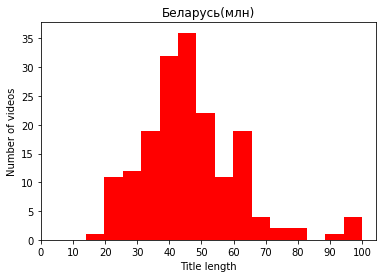

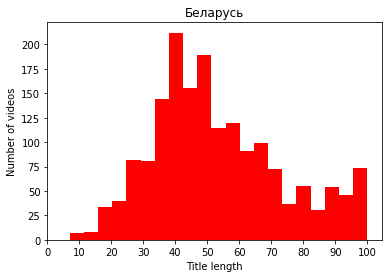

In [ ]:
title_length_bar(df_blr_mln, 'Беларусь(млн)')
title_length_bar(df_blr, 'Беларусь')

## **Distribution of amount of videos by video duration in the country**

In [ ]:
def duration_bar(df, country):
  fig, ax = plt.subplots()
  _ = sns.distplot(df["duration"], kde=False, rug=False, color='r', hist_kws={'alpha': 1}, ax=ax)
  _ = ax.set(xlabel="Duration", ylabel="Number of videos")
  _ = ax.set_title(country)
  fig.savefig(country + 'duration.png')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


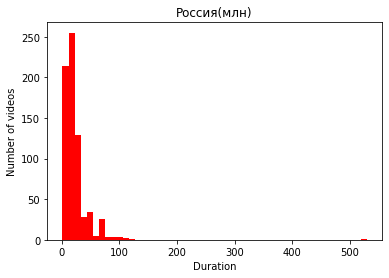

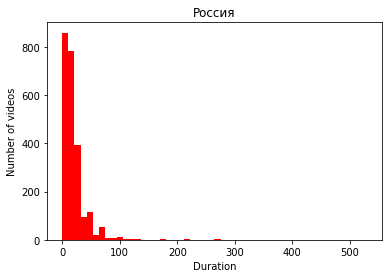

In [ ]:
duration_bar(df_rus_mln, 'Россия(млн)')
duration_bar(df_rus, 'Россия')

# **Distribution of amount of videos by categories in the country**

In [ ]:
def weekday_bar(df, country):
  cdf = df['weekday'].value_counts().to_frame().reset_index().rename(columns={"index": "Weekday of publishing", "weekday": "Number of videos"})
  fig, ax = plt.subplots()
  _ = sns.barplot(x="Weekday of publishing", y="Number of videos", data=cdf, palette=sns.color_palette('tab10'))
  fig.savefig(country + ".png")

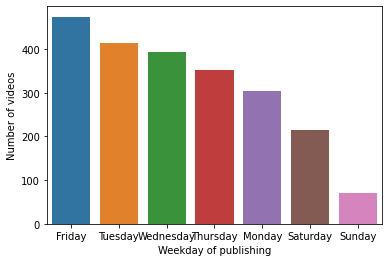

In [ ]:
weekday_bar(df = df_usa, country = "BLR")

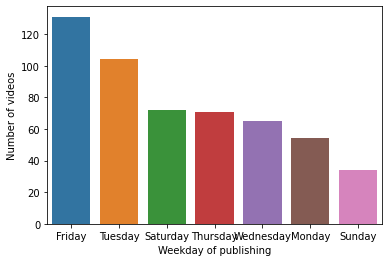

In [ ]:
weekday_bar(df = df_usa_mln, country = "BLR")

# **Distribution of amount of videos by hour of publishing in the country**

In [ ]:
for df in df_list:
  df['publishing_hour'] = df['publish_date'].apply(lambda x: x[11:13])

In [ ]:
for df in df_popular_list:
  df['publishing_hour'] = df['publish_date'].apply(lambda x: x[11:13])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def hour_bar(df, country):
  cdf = df['publishing_hour'].value_counts().to_frame().reset_index().rename(columns={"index": "Hours of publishing", "publishing_hour": "Number of videos"})
  fig, ax = plt.subplots()
  _ = sns.barplot(x="Hours of publishing", y="Number of videos", data=cdf, palette=sns.color_palette('tab10'), ax=ax)
  _ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")
  fig.savefig(country + "hour.png")

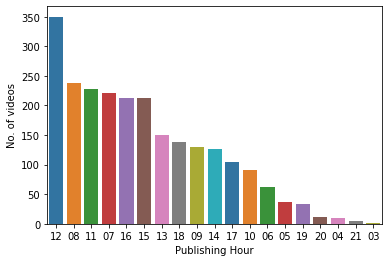

In [ ]:
hour_bar(df = df_rus, country = 'BLR')

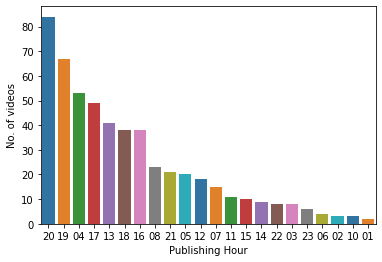

In [ ]:
hour_bar(df = df_ris, country = 'RUS')

# **Distribution of amount of videos by categories in the country**

In [ ]:
topics_dict = {2: "Autos & Vehicles", 1: "Film & Animation", 10: "Music", 15: "Pets & Animals", 17: "Sports", 18: "Short Movies", 19: "Travel & Events", 20: "Gaming", 21: "Videoblogging", 22: "People & Blogs", 23: "Comedy", 24: "Entertainment", 25: "News & Politics", 26: "Howto & Style", 27: "Education", 28: "Science & Technology", 29: "Nonprofits & Activism", 30: "Movies", 31: "Anime/Animation", 32: "Action/Adventure", 33: "Classics", 34: "Comedy", 35: "Documentary", 36: "Drama", 37: "Family", 38: "Foreign", 39: "Horror", 40: "Sci-Fi/Fantasy", 41: "Thriller", 42: "Shorts", 43: "Shows", 44: "Trailers"}

In [ ]:
def topic_bar(df, country):
    topic = df['video_category'].value_counts()
    plt.title('Распределение видео по темам в ' + str(country))
    plt.xlabel('Темы')
    plt.ylabel('Количество роликов')
    topic.plot(kind = 'bar', label = 'Количество роликов данной категории')
    plt.legend(fontsize = 10)
    plt.savefig(country + 'categories.png')

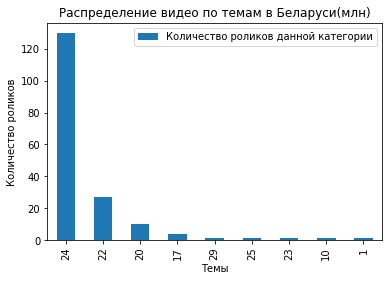

In [ ]:
topic_bar(country = 'Беларуси(млн)', df = df_blr_mln)

## Using CAPS words

In [ ]:
def is_text_with_caps(text):
    for word in text.split():
        if word.isupper():
            return True
    return False

In [ ]:
for df in df_list:
    df["caps"] = df["video_title"].apply(is_text_with_caps)

In [ ]:
for df in df_popular_list:
    df["caps"] = df["video_title"].apply(is_text_with_caps)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
def caps_pie(df, country):
  caps_dict = df["caps"].value_counts().to_dict()
  fig, ax = plt.subplots()
  _ = ax.pie([caps_dict[False], caps_dict[True]], labels=['Нет', 'Да'], colors=['b', 'y'], startangle=60, )
  _ = ax.axis('equal')
  _ = ax.set_title(country)
  fig.savefig(country + 'pie.png')

In [ ]:
def views_in_caps(df):
  return df[df['caps'] == True]['video_view_count'].sum() / df['video_view_count'].sum()

In [ ]:
for df in df_list:
  print(views_in_caps(df))

0.66318775598416
0.6209101389602321
0.958811206040371
0.33937657035583196


In [ ]:
for df in df_popular_list:
  print(views_in_caps(df))

0.680072845322463
0.7698822969740111
0.9835737150882045
0.34762912741938945


# Most common words in video descriptions, titles and tags (Russia, Ukraine, Belarus)

Copy titles, descriptions, tags to manipulate with 'em 

In [ ]:
for df in df_list_rus:
  df['video_title_lemmatized'] = df.video_title
  df['video_description_lemmatized'] = df.video_description
  df['video_tags_lemmatized'] = df.video_tags

Lemmatizing 

In [ ]:
regex = re.compile("[А-Яа-я]+")
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']
mystoplemmas = ['который','прошлый','сей', 'свой', 'наш', 'мочь', 'такой']


m = Mystem()

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))

def remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "
    
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

for df in df_list_rus:

  df.video_title_lemmatized = df.video_title_lemmatized.apply(lemmatize)
  df.video_title_lemmatized = df.video_title_lemmatized.str.lower()
  df.video_title_lemmatized = df.video_title_lemmatized.apply(words_only)
  df.video_title_lemmatized = df.video_title_lemmatized.apply(remove_stopwords)  
  df.video_title_lemmatized = df.video_title_lemmatized.apply(remove_stoplemmas)

  df.video_description_lemmatized = df.video_description_lemmatized.apply(lemmatize)
  df.video_description_lemmatized = df.video_description_lemmatized.str.lower()
  df.video_description_lemmatized = df.video_description_lemmatized.apply(words_only)
  df.video_description_lemmatized = df.video_description_lemmatized.apply(remove_stopwords)  
  df.video_description_lemmatized = df.video_description_lemmatized.apply(remove_stoplemmas)

  df.video_tags_lemmatized = df.video_tags_lemmatized.apply(lemmatize)
  df.video_tags_lemmatized = df.video_tags_lemmatized.str.lower()
  df.video_tags_lemmatized = df.video_tags_lemmatized.apply(words_only)
  df.video_tags_lemmatized = df.video_tags_lemmatized.apply(remove_stopwords)  
  df.video_tags_lemmatized = df.video_tags_lemmatized.apply(remove_stoplemmas)

In [ ]:
def creating_frequency_dict(df):
  lemmata_titles = list()
  lemmata_descriptions = list()
  lemmata_tags = list()
  for index, row in df.iterrows():
    lemmata_tags += row['video_tags_lemmatized'].split()
    lemmata_titles += row['video_title_lemmatized'].split()
    lemmata_descriptions += row['video_description_lemmatized'].split()
  fd_tags = FreqDist(lemmata_tags)
  fd_titles = FreqDist(lemmata_titles)
  fd_descriptions = FreqDist(lemmata_descriptions)
  return fd_tags, fd_titles, fd_descriptions

In [ ]:
fd_tags, fd_titles, fd_descriptions  = creating_frequency_dict(df = df_blr_mln)

In [ ]:
def show_word_cloud_tags():
  word_freq_tags = [i for i in fd_tags.most_common(100)] 
  wd = WordCloud(background_color='white')
  wd.generate_from_frequencies(dict(word_freq_tags))
  plt.figure()
  plt.imshow(wd, interpolation = 'bilinear')
  plt.axis('off')
  plt.savefig('tags_blr.png')
  print(fd_tags.most_common(10))

In [ ]:
def show_word_cloud_titles():
  word_freq_titles = [i for i in fd_titles.most_common(100)] 
  wd = WordCloud(background_color='white')
  wd.generate_from_frequencies(dict(word_freq_titles))
  plt.figure()
  plt.imshow(wd, interpolation = 'bilinear')
  plt.axis('off')
  plt.savefig('titles_blr.png')
  print(fd_titles.most_common(10))

In [ ]:
def show_word_cloud_descriptions():
  word_freq_descriptions = [i for i in fd_descriptions.most_common(100)] 
  wd = WordCloud(background_color='white')
  wd.generate_from_frequencies(dict(word_freq_descriptions))
  plt.figure()
  plt.imshow(wd, interpolation = 'bilinear')
  plt.axis('off')
  plt.savefig('descriptions_blr.png')
  print(fd_descriptions.most_common(10))